# PROJECT  TASK - WEEK 1


# Load the required data files


In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Read CSV file
csv1_file_path = "/content/Hospitalisation details.csv"
df1 = pd.read_csv(csv1_file_path)

csv2_file_path = "/content/Medical Examinations.csv"
df2 = pd.read_csv(csv2_file_path)

# Read Excel file
excel_file_path = "/content/Names.xlsx"
df3 = pd.read_excel(excel_file_path)

# DATA EXPLORATION



In [2]:
## check for any null values
df1.isna().sum()

Customer ID      0
year             0
month            0
date             0
children         0
charges          0
Hospital tier    0
City tier        0
State ID         0
dtype: int64

In [3]:
df2.isna().sum()

Customer ID               0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

In [4]:
df3.isna().sum()

Customer ID    0
name           0
dtype: int64

# DATA CLEANING

In [5]:
## merge df1 and df2
df4 = pd.merge(df1, df2, on = "Customer ID", how = "inner")

## convert the merged dataframe to a csv file
df4.to_csv("df4", index=False)

## merge df4 with df3
final_df = pd.merge(df4, df3, on = 'Customer ID', how = "inner")

## convert the merged dataframe to a final csv file
final_df.to_csv("final_df", index=False)

In [6]:
final_df.shape

(2335, 17)

In [7]:
# Find rows with trivial values (e.g., "?")
trivial = final_df[final_df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]

# Calculate the percentage of rows with trivial values
percent_trivial = (len(trivial) / len(final_df)) * 100
percent_trivial


0.4282655246252677

In [8]:
# Deleting the rows with trivial values
final_df2 = final_df[~final_df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]
final_df2.shape

(2325, 17)

In [9]:
final_df2.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

# DATA PREPROCESSING

In [10]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [11]:
## Convert hospital_tier and city_tier columns using onehot encoder
ohe = OneHotEncoder()
ohe.fit_transform(final_df2[['Hospital tier']]).toarray().astype('int')
column_names = ohe.get_feature_names_out(['Hospital tier'])

Hospital_tier = pd.DataFrame(ohe.fit_transform(final_df2[['Hospital tier']]).toarray().astype('int'), columns = column_names)


In [12]:
ohe.fit_transform(final_df2[['City tier']]).toarray().astype('int')
column_names = ohe.get_feature_names_out(['City tier'])

City_tier = pd.DataFrame(ohe.fit_transform(final_df2[['City tier']]).toarray().astype('int'), columns = column_names)

In [13]:
## concat the Hospital_tier and City_tier and final_df2 files
final_df = pd.concat([final_df2,Hospital_tier, City_tier], axis = 1)

In [14]:
final_df.dropna(inplace = True)

In [15]:
## Assign numerical values to heart issues, any transplants, cancer history, smoker columns
final_df['Heart Issues_yes'] = final_df['Heart Issues'].apply(lambda x: 1 if x == 'yes' else 0)

final_df['Any Transplants_yes'] = final_df['Any Transplants'].apply(lambda x: 1 if x == 'yes' else 0)

final_df['Cancer history_yes'] = final_df['Cancer history'].apply(lambda x: 1 if x == 'Yes' else 0)

final_df['smoker_yes'] = final_df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [16]:
## convert string to numerical value 0 in column NumberOfMajorSurgeriesalso for Nomajorsurgeries
final_df['NumberOfMajorSurgeries'] = final_df['NumberOfMajorSurgeries'].apply(lambda x: 0 if x == 'No major surgery' else x)


In [17]:
## drop redundant columns from  final_df
final_df.drop(['Heart Issues', 'Any Transplants', 'Cancer history', 'smoker'], axis = 1, inplace = True)

In [18]:
columns = ['year', 'date','children','Hospital tier_tier - 1',	'Hospital tier_tier - 2','Hospital tier_tier - 3', 'City tier_tier - 1',	'City tier_tier - 2',	'City tier_tier - 3']
final_df[columns] = final_df[columns].astype(int)

In [19]:
# Create one-hot encoding for specific states
one_hot_states = pd.get_dummies(final_df['State ID'].apply(str))[['R1011', 'R1012', 'R1013']].astype('int')

# Concatenate one-hot encoded columns with the original DataFrame
final_df_encoded = pd.concat([final_df, one_hot_states], axis=1)

In [20]:
final_df_encoded.drop(columns = ['State ID'], inplace = True)

In [21]:
final_df_encoded["dob"] = final_df_encoded["year"].astype(str) + "-" + final_df_encoded["month"].astype(str) + "-" + final_df_encoded["date"].astype(str)
final_df_encoded['dob'] = pd.to_datetime(final_df_encoded['dob'])

In [22]:
# Get current year, month, and day
from datetime import datetime
today = datetime.today()

# Calculate ages
ages = []
for index, row in final_df_encoded.iterrows():
    age = today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))
    ages.append(age)

# Add ages to the DataFrame
final_df_encoded['Age'] = ages

In [23]:
final_df_encoded['Gender'] = final_df_encoded['name'].apply(lambda x: 'Male' if 'Mr' in x else 'Female')
final_df_encoded['Gender_Male'] = final_df_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
final_df_encoded['Gender_Female'] = final_df_encoded['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [24]:
final_df_encoded.drop(['dob'], axis = 1,inplace = True)

In [25]:
final_df_encoded.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants_yes,Cancer history_yes,smoker_yes,R1011,R1012,R1013,Age,Gender,Gender_Male,Gender_Female
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,0,0,0,0,0,1,31,Male,1,0
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,0,0,0,0,0,1,31,Male,1,0
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,0,1,0,0,0,1,30,Female,0,1
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,0,0,0,0,0,1,31,Male,1,0
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,0,0,0,0,0,1,25,Male,1,0


# DATA VISUALIZATION

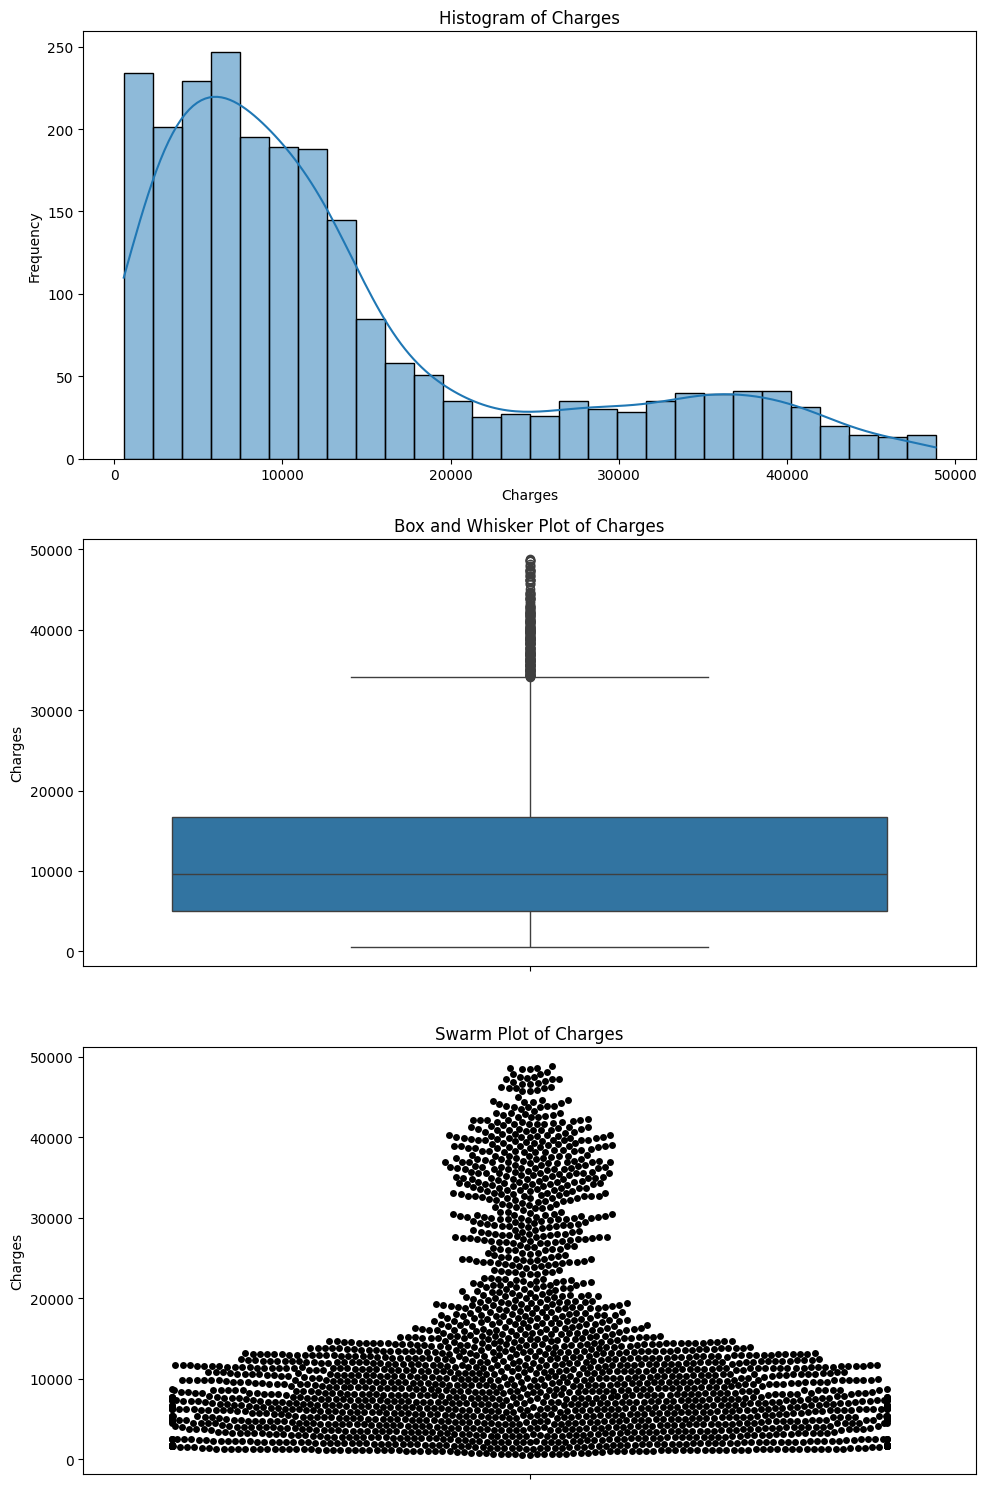

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram
sns.histplot(final_df_encoded['charges'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Charges')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')

# Box and whisker plot
sns.boxplot(data=final_df_encoded, y='charges', ax=axes[1])
axes[1].set_title('Box and Whisker Plot of Charges')
axes[1].set_ylabel('Charges')

# Swarm plot
sns.swarmplot(data=final_df_encoded, y='charges', color='black', ax=axes[2])
axes[2].set_title('Swarm Plot of Charges')
axes[2].set_ylabel('Charges')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution across gender and tiers of hospitals')

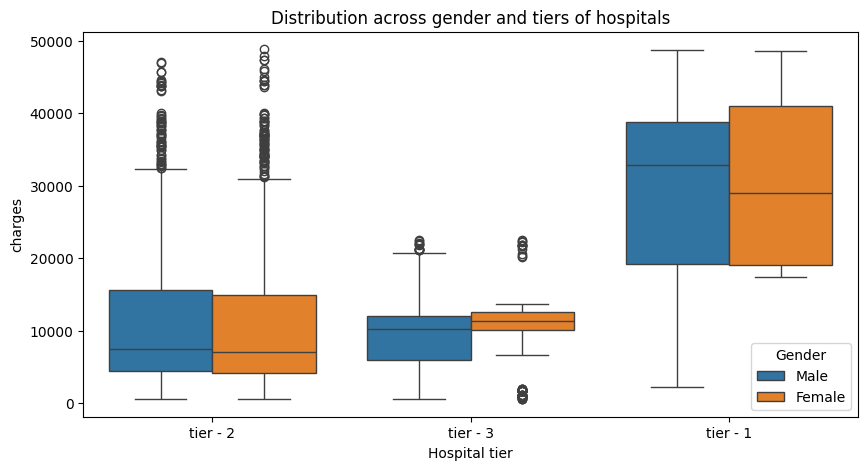

In [27]:
plt.figure(figsize =  (10, 5))
sns.boxplot(data=final_df_encoded,y='charges',x='Hospital tier', hue = 'Gender')
plt.title('Distribution across gender and tiers of hospitals')

In [28]:
# Calculate median charges for each Hospital tier
median_charges = final_df_encoded.groupby('Hospital tier')['charges'].median()
df_median_charges = pd.DataFrame({'Hospital tier':median_charges.index, 'Median costs':median_charges.values})


In [29]:
import plotly.express as px

fig = px.line_polar(df_median_charges, r='Median costs', theta = 'Hospital tier', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(title_text = 'Median Hospital Cost across Hospital Tiers')
fig.show()

In [30]:
# Creating a frequency table
frequency_table = pd.crosstab(final_df_encoded['City tier'], final_df_encoded['Hospital tier'])
frequency_table

Hospital tier,tier - 1,tier - 2,tier - 3
City tier,,,
tier - 1,85,403,241
tier - 2,103,478,222
tier - 3,105,451,228


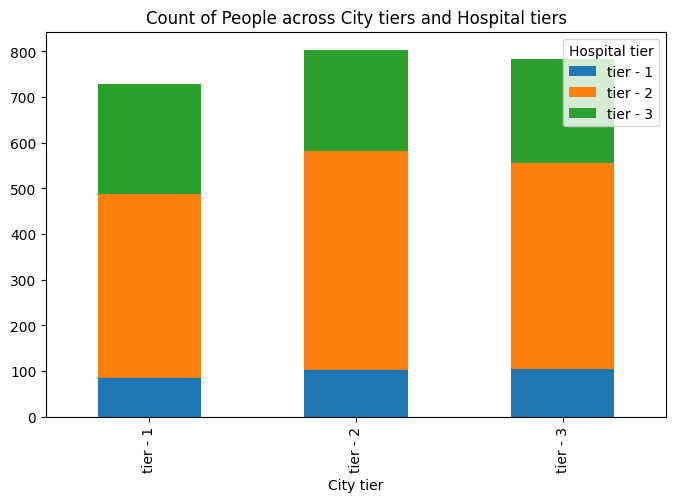

In [31]:
# Plotting a stacked bar chart

frequency_table.plot(kind='bar', stacked=True, title = 'Count of People across City tiers and Hospital tiers',
                     figsize = (8,5))
plt.show()

# CHECK NULL HYPOTHESIS

In [32]:
## create a subset of datasets for the hospital tier-1,2 and 3 using where condition

tier1 = final_df_encoded.where( final_df_encoded['Hospital tier'] == 'tier - 1')
tier1.dropna(inplace = True)
tier2 = final_df_encoded.where( final_df_encoded['Hospital tier'] == 'tier - 2')
tier2.dropna(inplace = True)
tier3 = final_df_encoded.where( final_df_encoded['Hospital tier'] == 'tier - 3')
tier3.dropna(inplace = True)

In [33]:
# Null Hypotheses: the average costs for all 3 tiers are equal
# since the sample sets are more than 2, we go for ANOVA test
# import scipy library f_oneway() to implement oneway ANOVA test on the samples

In [34]:
from scipy.stats import f_oneway

f_oneway(tier1['charges'], tier2['charges'], tier3['charges'])

F_onewayResult(statistic=472.9791736635691, pvalue=6.215495752342654e-173)

In [35]:
# the p-value from the test is < 0.05, so reject the NULL Hypothesis
# the average costs of the 3 tiers of hospitals are not equal
# REJECT NULL HYPOTHESIS

In [36]:
## create a subset of datasets for the city tier-1,2 and 3 using where condition

tier1_city = final_df_encoded.where( final_df_encoded['City tier'] == 'tier - 1')
tier1_city.dropna(inplace = True)
tier2_city = final_df_encoded.where( final_df_encoded['City tier'] == 'tier - 2')
tier2_city.dropna(inplace = True)
tier3_city = final_df_encoded.where( final_df_encoded['City tier'] == 'tier - 3')
tier3_city.dropna(inplace = True)

In [37]:
# Null Hypotheses: the average costs for all city tiers are equal
# since the sample sets are more than 2, we go for ANOVA test
# implement oneway ANOVA test on the samples

f_oneway(tier1_city['charges'], tier2_city['charges'], tier3_city['charges'])

F_onewayResult(statistic=0.8292053730864031, pvalue=0.436525604481552)

In [38]:
# the p-value from the test is > 0.05, so fail to reject the NULL Hypothesis
# the average costs of the 3 tiers of hospitals are not significantly different
# FAIL TO REJECT NULL HYPOTHESIS

In [39]:
# CHECK NULL HYPOTHESIS: Average costs of smokers and non smokers is not significantly different

## create a subset of datasets for the smokers and non-smokers

smoker = final_df_encoded.where( final_df_encoded['smoker_yes'] == 1)
smoker.dropna(inplace = True)
nonsmoker = final_df_encoded.where( final_df_encoded['smoker_yes'] == 0)
nonsmoker.dropna(inplace = True)

In [40]:
## conduct independent 2 sample t-test for hypothesis testing
import scipy.stats as stats
t_stat,p_value = stats.ttest_ind(smoker['charges'], nonsmoker['charges'],equal_var = False)

In [41]:
print(t_stat,p_value)

57.49867933889883 7.521380851577407e-242


In [42]:
# the p-value from the test is < 0.05, so reject the NULL Hypothesis
# the average costs of the smokers and non-smokers are significantly different
# REJECT NULL HYPOTHESIS

In [43]:
# create frequency table for smoker and heart issues columns
freq_table = pd.crosstab(final_df_encoded['smoker_yes'], final_df_encoded['Heart Issues_yes'])
freq_table

Heart Issues_yes,0,1
smoker_yes,,
0,1108,731
1,289,188


In [44]:
# check null hypothesis for independence between 2 variables smoker and heart issues
# use chi2_contingency function from the SciPy library

stats.chi2_contingency(freq_table)

Chi2ContingencyResult(statistic=0.006640834903991297, pvalue=0.9350512291745803, dof=1, expected_freq=array([[1109.27590674,  729.72409326],
       [ 287.72409326,  189.27590674]]))

In [45]:
# H0: (null hypothesis) The two variables are independent.
# H1: (alternative hypothesis) The two variables are not independent.
# the p-value from the test is > 0.05, so fail to reject the NULL Hypothesis
# the 2 variables smoking and heart issues are independent of each other
# FAIL TO REJECT NULL HYPOTHESIS

# PROJECT TASK - WEEK 2

# Heat Map Correlation

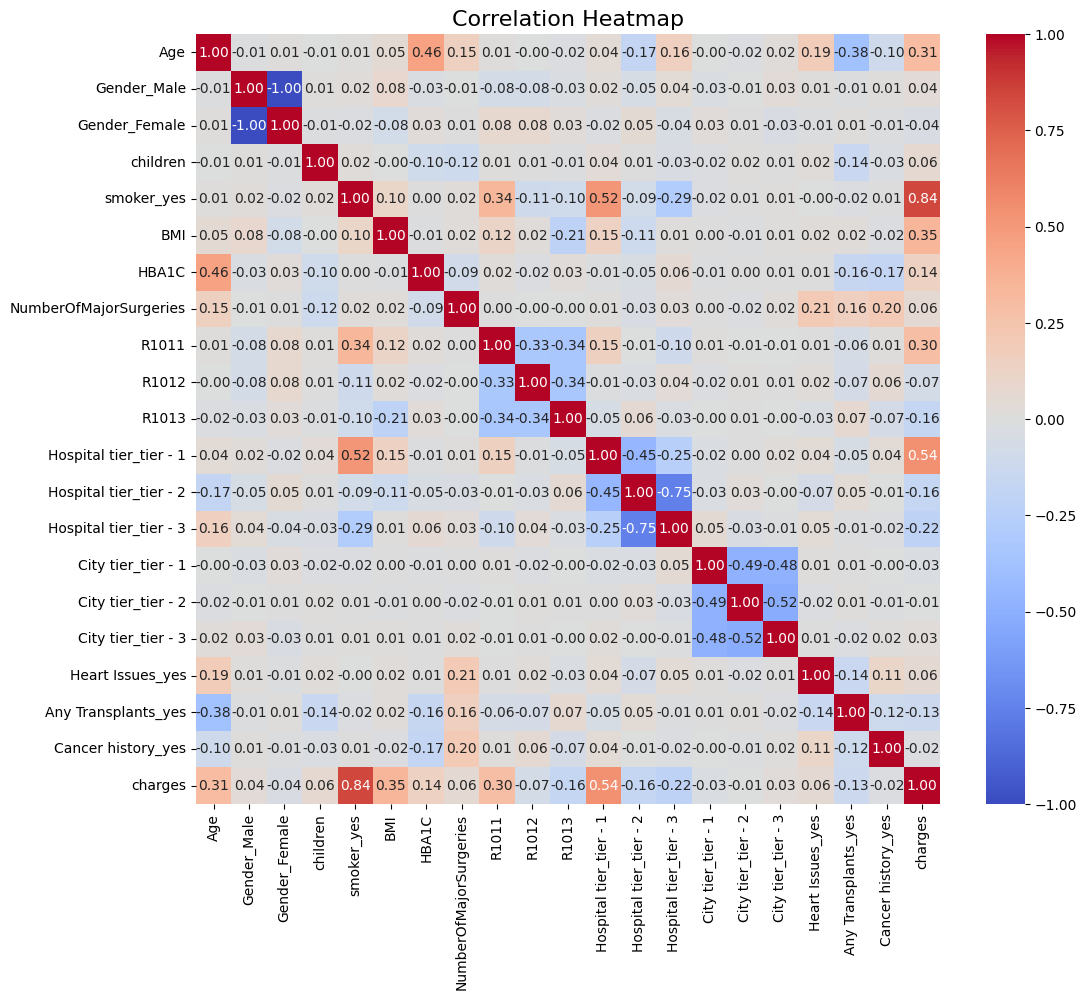

In [46]:
# Selecting the columns for the heatmap
columns_for_heatmap = ['Age', 'Gender_Male', 'Gender_Female', 'children', 'smoker_yes', 'BMI',
                       'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                       'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                       'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                       'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_yes', 'charges']

# Calculating the correlation matrix
correlation_matrix = final_df_encoded[columns_for_heatmap].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# RIDGE REGRESSION MODEL

In [47]:
## import the required libraries

import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

In [48]:
## prepare dataframe for the independent variables and one dependent variable 'charges'
selected_columns = ['Age', 'Gender_Male', 'Gender_Female', 'children', 'smoker_yes', 'BMI',
                       'HBA1C', 'NumberOfMajorSurgeries', 'R1011', 'R1012', 'R1013',
                       'Hospital tier_tier - 1', 'Hospital tier_tier - 2', 'Hospital tier_tier - 3',
                       'City tier_tier - 1', 'City tier_tier - 2', 'City tier_tier - 3',
                       'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_yes', 'charges']

# Splitting features (X) and target (y)
X = final_df_encoded[selected_columns].drop(columns='charges')
y = final_df_encoded['charges']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define regression models
linear_regression = LinearRegression()
ridge_regression = Ridge()

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate models
linear_cv_scores = cross_val_score(linear_regression, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
ridge_cv_scores = cross_val_score(ridge_regression,X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

print("Linear Regression CV Scores:")
print("Mean:", -linear_cv_scores.mean())
print("Standard Deviation:", linear_cv_scores.std())
print("\nRidge Regression CV Scores:")
print("Mean:", -ridge_cv_scores.mean())
print("Standard Deviation:", ridge_cv_scores.std())

Linear Regression CV Scores:
Mean: 18594113.85384363
Standard Deviation: 1019055.7484081907

Ridge Regression CV Scores:
Mean: 18581043.907581866
Standard Deviation: 1001070.2553831289


In [49]:
## GridsearchCV for hyperparameter tuning
# Splitting the data into train and test sets
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

params =   {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(ridge_regression,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=1)

grid.fit(X_train, y_train)


print("Best Hyperparameters:",  grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'alpha': 1}


In [50]:
## Predict and evaluate model performance
from sklearn.metrics import mean_squared_error

y_pred = grid.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse_test)

Root Mean Squared Error: 4185.643686392882


Root Mean Squared Error: 3275.2785518008855
Feature Importances:
                   Feature  Importance
4               smoker_yes    0.752620
5                      BMI    0.114276
0                      Age    0.091467
11  Hospital tier_tier - 1    0.014238
3                 children    0.007942
8                    R1011    0.005823
13  Hospital tier_tier - 3    0.004243
10                   R1013    0.004215
6                    HBA1C    0.003089
9                    R1012    0.000879
12  Hospital tier_tier - 2    0.000415
16      City tier_tier - 3    0.000188
18     Any Transplants_yes    0.000185
7   NumberOfMajorSurgeries    0.000110
15      City tier_tier - 2    0.000102
19      Cancer history_yes    0.000101
2            Gender_Female    0.000033
14      City tier_tier - 1    0.000030
17        Heart Issues_yes    0.000030
1              Gender_Male    0.000014


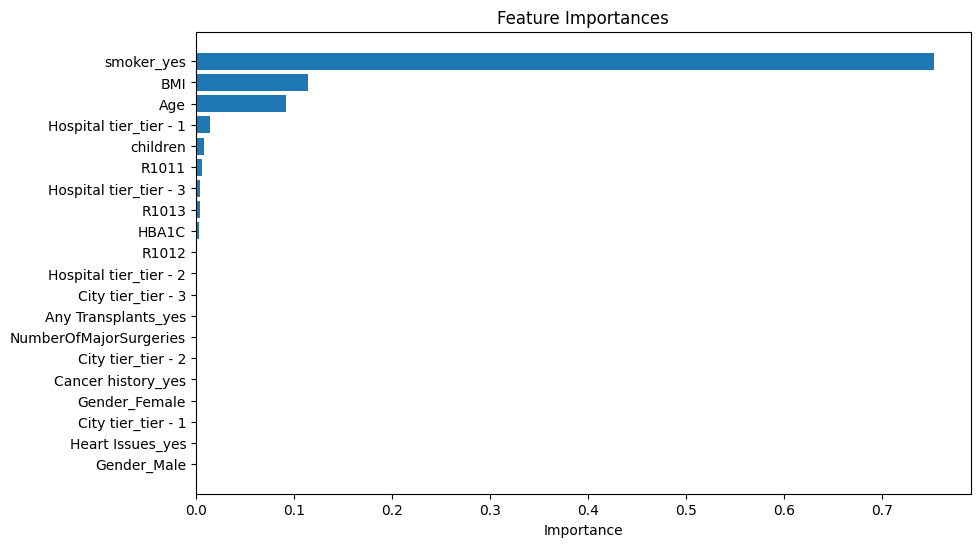

In [51]:
## Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse_test)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_columns[:-1], 'Importance': feature_importances})
# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [52]:
# Case Scenario of 'Christopher, Ms. Jayna'
data = {
    'Gender_Male': [0],
    'Gender_Female':[1],
    'Age': [35], # Age calculation based on the current year
    'children': [2],
    'BMI': [29.4],  # BMI calculation: weight (kg) / (height (m) ^ 2)
    'HBA1C': [5.8],
    'NumberOfMajorSurgeries': [0],
    'R1011': [1],
    'R1012': [0],
    'R1013':[0],
    'Hospital tier_tier - 1': [1],
    'Hospital tier_tier - 2': [0],
    'Hospital tier_tier - 3': [0],
    'City tier_tier - 1': [1],
    'City tier_tier - 2': [0],
    'City tier_tier - 3': [0],
    'Heart Issues_yes': [0],
    'Any Transplants_yes': [0],
    'Cancer history_Yes': [0],
    'smoker_yes': [1]
    }

# Create DataFrame
X_case = pd.DataFrame(data)

# using gradient boosting regressor as the best fit model to predict hospitalization cost
predicted_costs = gb_model.predict(X_case)

# Display the result
print("Predicted costs of 'Christopher, Ms. Jayna' : ", predicted_costs)

Predicted costs of 'Christopher, Ms. Jayna' :  [40117.832382]


In [53]:
final_df_encoded.to_excel("final_df.xlsx")